In [1]:
import os
import sys
import numpy as np 
import open3d as o3d
import matplotlib.pyplot as plt
import pandas as pd
import colorsys

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# load dataset
df = pd.read_pickle("../final_dataset.pkl") 

In [3]:
df

,id,voxelgrids,positions,poses,odoms
2,-1,"[[[25, 53], [32, 2], [17, 54], [26, 50], [30, ...","[[0.7827229554855963, -0.6603078958156333, 4.5...","[[[31.0, 57.0, 0.1766081601381302], [27.0, 52....","[[0.00022100093561436428, -0.00164606522993054..."
5,-1,"[[[17, 38], [36, 71], [18, 39], [29, 53], [24,...","[[1.8763295554092785, -0.7392371475816817, 8.6...","[[[17.0, 1.0, 0.22867129743099213], [17.0, 1.0...","[[-0.0010584275078791316, 0.005180639174413457..."
6,-1,"[[[13, 56], [8, 46], [20, 66], [44, 3], [43, 6...","[[1.2298735958886313, -0.6599135136166747, 8.2...","[[[19.0, 13.0, 0.1444173902273178], [17.0, 11....","[[-0.017197470816407222, -0.008501126993886861..."
7,-1,"[[[29, 68], [66, 59], [11, 93], [73, 58], [24,...","[[0.49709940835786537, -0.62631209064576, 7.09...","[[[18.0, 5.0, 0.17500989139080048], [21.0, 2.0...","[[0.00810160200217194, -0.006334385323650088, ..."
11,-1,"[[[22, 6], [23, 14], [23, 15], [26, 21], [23, ...","[[0.9673029278573837, -0.3436083278432631, 2.9...","[[[62.0, 62.0, 0.14962413907051086], [73.0, 45...","[[-0.027349297901359395, -0.011966854241542754..."
...,...,...,...,...,...
62,-1,"[[[23, 44], [40, 63], [51, 39], [54, 38], [55,...","[[2.0646910369067157, 0.029454739485260374, 12...","[[[17.0, 8.0, 0.43804463744163513], [18.0, 7.0...","[[0.8201163085873395, 0.018439196137287176, -0..."
63,-1,"[[[27, 41], [34, 33], [35, 32], [25, 49], [35,...","[[0.5297943744939886, 0.15403182231884144, 14....","[[[6.0, 10.0, 0.3750530183315277], [7.0, 8.0, ...","[[0.911513839439134, 0.07117954683799506, -0.0..."
64,-1,"[[[31, 27], [31, 28], [19, 24], [32, 27], [29,...","[[0.3631588607892603, 0.27299791081880703, 14....","[[[6.0, 6.0, 0.3497787415981293], [8.0, 4.0, 0...","[[0.7936269466417343, 0.10402028277580025, -0...."
65,-1,"[[[18, 1], [20, 27], [20, 40], [20, 8], [20, 2...","[[1.5867438468388022, 0.005319278432432738, 6....","[[[36.0, 20.0, 0.1559334546327591], [39.0, 17....","[[-0.029723254697543874, -0.012977081281250333..."


In [17]:
# load specific track
track_nr = 780

# get pointcloud
test_pts = df.iloc[track_nr]["positions"]
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(test_pts)

In [5]:
# visualise in 3d
ls_lines = [[i,i+1] for i in range(0,test_pts.shape[0]-1)]
ls_colours = colors = [colorsys.hsv_to_rgb(i / 300., 1.0, 1.0) for i in range(len(ls_lines))]
ls = o3d.geometry.LineSet()
ls.points = o3d.utility.Vector3dVector(test_pts) # shape: (num_points, 3)
ls.lines = o3d.utility.Vector2iVector(ls_lines)   
ls.colors = o3d.utility.Vector3dVector(ls_colours)
o3d.visualization.draw_geometries([ls])

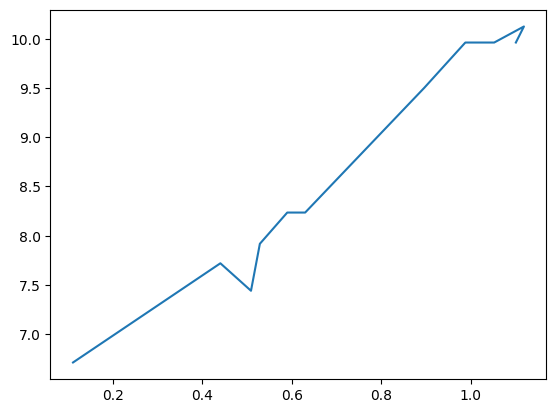

In [19]:
# visualise in 2d
x = test_pts[:,0]
y = test_pts[:,1]
z = test_pts[:,2]
plt.plot(x,z)